In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [10]:
df1 = pd.read_json('Players_ex_gk_detailed_table.json')
df2 = pd.read_json('Gk_detailed_table.json')
df = pd.concat([df2, df1], ignore_index=True, sort=False)
df = df.sort_values('Player_id', ascending=False)
df = df.reset_index(drop=True)
top_leagues = ['Serie A', 'LaLiga', 'Bundesliga', 'Premier League', 'Ligue 1']
df = df[df['Competition'].isin(top_leagues)]
df = df[df['Season'] == '21/22']
cols_with_dash = df.columns[df.isin(['-']).any()]
df[cols_with_dash] = df[cols_with_dash].replace('-', 0)
df.Assists = df.Assists.fillna(0)
cols_to_convert = ['Player_id', 'Apperance', 'Goals']
df[cols_to_convert] = df[cols_to_convert].astype(int)
df1 = df[['Player_id', 'Season', 'Goals', 'Apperance']]

In [11]:
df = pd.read_json('player_details.json')
df = df.rename(columns={'Player_ID': 'Player_id'})
df['Current market value'] = df['Current market value'].replace({'k': 'e3', 'm': 'e6','b':'e9'}, regex=True)
df['Current market value'] = pd.to_numeric(df['Current market value'], errors='coerce')
df2 = df[['Player_id','Current market value','Position']]

In [12]:
merged_df = pd.merge(df1, df2, on='Player_id')
merged_df['Current market value'] = merged_df['Current market value'].fillna(0)
df = merged_df.dropna()
df = df.drop_duplicates(subset='Player_id')
# df.sort_values('Goals',ascending=False)

In [13]:
df = df[['Player_id', 'Goals', 'Current market value']]
df = df[df['Current market value'].notna()]
df = df[df['Goals'].notna()]
# df.sort_values('Goals',ascending=False).head(20)

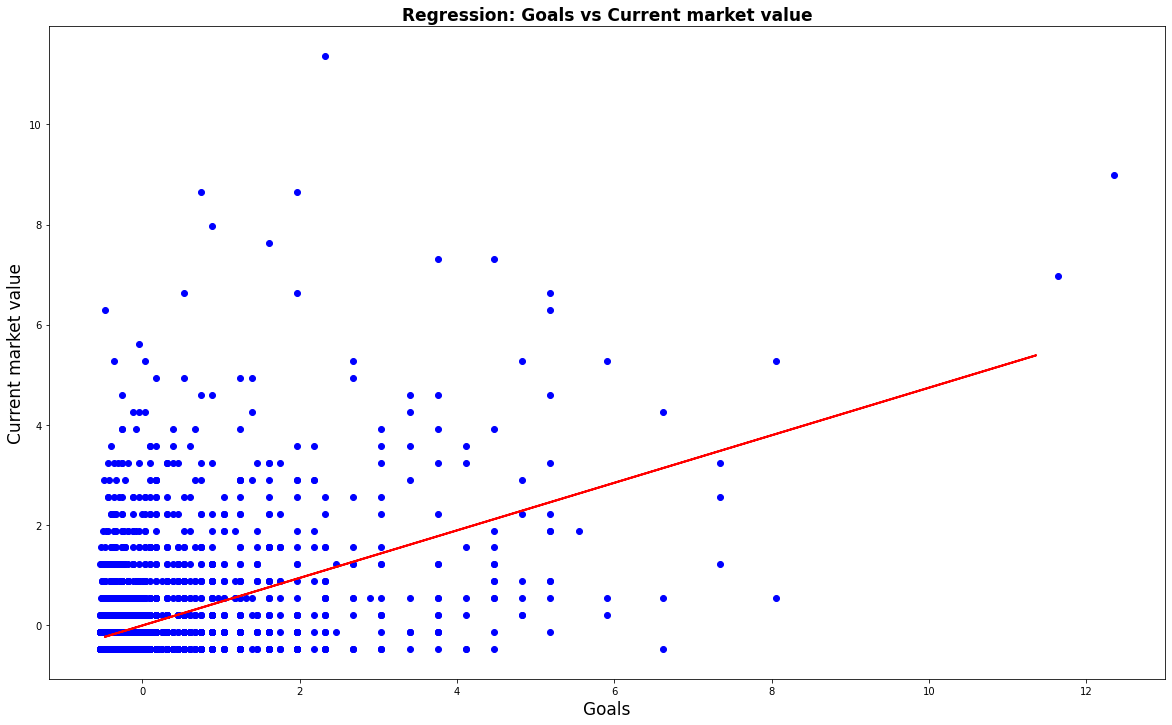

In [14]:

df= df.drop(columns = 'Player_id')
# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)

# Create X and y for regression
X = normalized_data[:, 0].reshape(-1, 1)  # goals
y = normalized_data[:, 1]  # Current market value

# Fit the regression model
regression = LinearRegression()
regression.fit(X, y)

# Plot the regression line
plt.figure(figsize=(20, 12))  
plt.scatter(y, X, color='blue')
plt.plot(X, regression.predict(X), color='red', linewidth=2 )
plt.xlabel('Goals', fontsize=17 )
plt.ylabel('Current market value', fontsize=17 )
plt.title('Regression: Goals vs Current market value', fontsize=17 ,fontweight = 'bold')
plt.show()
